In [38]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

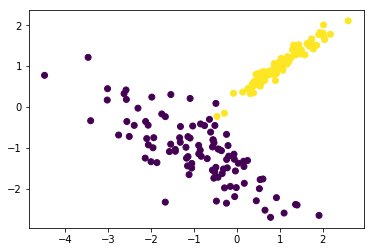

In [39]:
m = 200
X, y = datasets.make_classification(n_samples=m,
n_features=2,
n_informative=2,
n_redundant=0,
n_repeated=0,
n_classes=2,
n_clusters_per_class=1)
plt.scatter(X[:,0],X[:,1],c=y,marker='o');

y = y.reshape(-1,1)

n_inputs = X.shape[1]
n_outputs = 1
learning_rate = 0.01
n_epochs = 500

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [41]:
print(x_train.shape,y_train.shape)

(140, 2) (140, 1)


In [42]:
x_p = tf.placeholder(dtype=tf.float32, shape=[None,n_inputs],name='x_p')
y_p = tf.placeholder(dtype=tf.float32, shape=[None,1],name='y_p')
print(x_p.shape,y_p.shape)
weights = tf.Variable(tf.zeros(shape=(n_inputs,n_outputs)),name='weights')
bias = tf.Variable(tf.zeros((n_outputs)),name='bias')
print(weights.shape,bias.shape)

(?, 2) (?, 1)
(2, 1) (1,)


In [43]:
z = tf.matmul(x_p, weights) + bias
model = tf.sigmoid(z)
print(model.shape)

(?, 1)


In [44]:
loss_op = -tf.reduce_mean(y_p*tf.log(model) + (1-y_p)*tf.log(1-model),name='loss')
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss_op)

In [51]:
check_prediction = tf.equal(tf.round(model),y_p)
accuracy_op = tf.reduce_mean(tf.cast(check_prediction,tf.float32)) * 100

In [52]:
init = tf.global_variables_initializer()

In [55]:
with tf.Session() as sess:
    sess.run(init)
    loss_values = []
    for epoch in range(n_epochs):
        loss_value,accuracy_value,_=sess.run([loss_op,accuracy_op,optimizer],feed_dict={x_p:x_train,y_p:y_train})
        loss_values.append(loss_value)
        print(f'loss value:{loss_value},  accuracy: {accuracy_value}')
    weight_value,bias_value = sess.run([weights,bias])

loss value:0.6931473612785339,  accuracy: 51.42857360839844
loss value:0.6880249381065369,  accuracy: 99.28571319580078
loss value:0.6829635500907898,  accuracy: 99.28571319580078
loss value:0.6779623031616211,  accuracy: 99.28571319580078
loss value:0.673020601272583,  accuracy: 99.28571319580078
loss value:0.6681374311447144,  accuracy: 99.28571319580078
loss value:0.6633123159408569,  accuracy: 99.28571319580078
loss value:0.6585443615913391,  accuracy: 99.28571319580078
loss value:0.6538329720497131,  accuracy: 99.28571319580078
loss value:0.6491774320602417,  accuracy: 99.28571319580078
loss value:0.6445769667625427,  accuracy: 99.28571319580078
loss value:0.6400308609008789,  accuracy: 99.28571319580078
loss value:0.6355385780334473,  accuracy: 99.28571319580078
loss value:0.631099283695221,  accuracy: 99.28571319580078
loss value:0.6267123222351074,  accuracy: 99.28571319580078
loss value:0.6223769783973694,  accuracy: 99.28571319580078
loss value:0.6180925965309143,  accuracy: 

loss value:0.2484058141708374,  accuracy: 99.28571319580078
loss value:0.24772325158119202,  accuracy: 99.28571319580078
loss value:0.24704483151435852,  accuracy: 99.28571319580078
loss value:0.24637047946453094,  accuracy: 99.28571319580078
loss value:0.2457001805305481,  accuracy: 99.28571319580078
loss value:0.24503391981124878,  accuracy: 99.28571319580078
loss value:0.24437165260314941,  accuracy: 99.28571319580078
loss value:0.24371330440044403,  accuracy: 99.28571319580078
loss value:0.2430589348077774,  accuracy: 99.28571319580078
loss value:0.2424083948135376,  accuracy: 99.28571319580078
loss value:0.2417617291212082,  accuracy: 99.28571319580078
loss value:0.24111886322498322,  accuracy: 99.28571319580078
loss value:0.24047976732254028,  accuracy: 99.28571319580078
loss value:0.2398444563150406,  accuracy: 99.28571319580078
loss value:0.23921285569667816,  accuracy: 99.28571319580078
loss value:0.23858492076396942,  accuracy: 99.28571319580078
loss value:0.23796062171459198

loss value:0.16052311658859253,  accuracy: 99.28571319580078
loss value:0.16027000546455383,  accuracy: 99.28571319580078
loss value:0.16001781821250916,  accuracy: 99.28571319580078
loss value:0.1597665548324585,  accuracy: 99.28571319580078
loss value:0.15951621532440186,  accuracy: 99.28571319580078
loss value:0.15926681458950043,  accuracy: 99.28571319580078
loss value:0.15901830792427063,  accuracy: 99.28571319580078
loss value:0.15877069532871246,  accuracy: 99.28571319580078
loss value:0.15852399170398712,  accuracy: 99.28571319580078
loss value:0.1582781970500946,  accuracy: 99.28571319580078
loss value:0.15803329646587372,  accuracy: 99.28571319580078
loss value:0.15778924524784088,  accuracy: 99.28571319580078
loss value:0.15754608809947968,  accuracy: 99.28571319580078
loss value:0.1573038250207901,  accuracy: 99.28571319580078
loss value:0.15706242620944977,  accuracy: 99.28571319580078
loss value:0.15682187676429749,  accuracy: 99.28571319580078
loss value:0.15658217668533

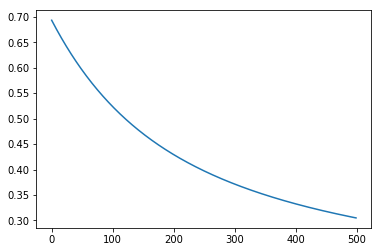

In [36]:
plt.plot(loss_values)
plt.show();

In [58]:
w1,w2 = weight_value

In [61]:
b = bias_value[0]

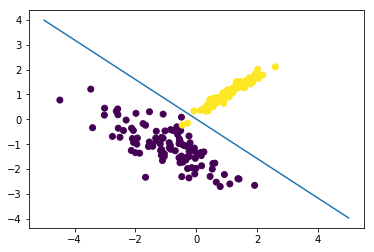

In [67]:
import numpy as np
x1 = np.linspace(-5,+5,200)
x2 = -(w1*x1+b)/w2
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y.reshape(-1,),marker='o');
plt.plot(x1,x2);

*:)*